## The Interview Attendence Problem by Sean Hensel-Coe

I work for a small recruitment agency so I wanted to find a relevant dataset with the ultimate goal of applying the insights I gained to my day job.

I found a small dataset on Kaggle called ‘The Interview Attendance Problem.’

This is the paraphrased dataset description taken from Kaggle: https://www.kaggle.com/vishnusraghavan/the-interview-attendance-problem

<i> "Context

The data pertains to the recruitment industry in India from 2014-2016 and deals with candidate interview attendance for various clients. The details are largely self-explanatory.


Content

Sets of questions are asked by a recruiter while scheduling the candidate. The answers to these determine whether expected attendance is yes, no or uncertain." </i> Raghavan, V (2017)


#### The goal

The goal of this project is to predict the likely hood of a candidate attending an interview using only the data provided. In this dataset, all candidates are offered interviews, however, they are not all screened. 

Method

- The data will be prepared and cleaned via means of data manipulation 
- Statistics insights will be generated and explored programmatically
- Visualisations will be produced to explore the data further 
- The data will go through some preprocessing before a model is produced
- Findings and insights will be summarised. This will include critical analysis, conclusions and possible actions that could be taken for further exploration 


#### Screening and default feature descriptions

Screening involves assessing the candidate before an interview. In a screening, recruiters assess availability, relevant skillsets etc. This dataset comes with a total of 28 columns. Most are self-explanatory ( ie, Date of Interview, Gender). Some are questions asked to candidates during the interview scheduling process. Many of these questions are oddly phrase so here's how I translate them.


The questions are:
 - "Have you obtained the necessary permission to start at the required time?"
 
 Translation: In other words, is the candidate able to take the time off to attend.
 
 
 - "Hope there will be no unscheduled meetings." 
 
 Translation: I think they're referring to the possibility of an unexpected meeting or commitment coming up last minute which could result in a candidate cancelling an interview.
 
 
 - "Can I Call you three hours before the interview and follow up on your attendance for the interview" 
 
 Translation: This is standard recruitment procedure, following up with a client or candidate on the day to make sure they are still attending an interview and are prepared.
 
 
 - "Can I have an alternative number/ desk number. I assure you that I will not trouble you too much" 
 
 Translation: Alternative phone number.
 
 
 - "Have you taken a printout of your updated resume. Have you read the JD and understood the same"
 
 Translation: Will the candidate bring a printout of their CV to an interview and have they read the job description.
 
 
 - "Are you clear with the venue details and the landmark."
 
 Translation: Does the candidate know where the interview will be held and are they confident there will be no travel issues.
 
 
 - "Has the call letter been shared"
 
 Translation: After scheduling an interview with a candidate, we will often send the candidate an email or Google cal invite with details of the call and other relevent interview details such as date and time.
 
 Raghavan, V (2017)

### Import Librarys 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Import Data

In [2]:
df = pd.read_csv('interview.csv', index_col = 'Name(Cand ID)')

From looking at the head of the data frame, we can see 5 'Unnamed' columns that are all empty.

In [3]:
df.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Gender,Candidate Current Location,Candidate Job Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
Name(Cand ID),,,,,,,,,,,,,,,,,,,,,
Candidate 1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Hosur,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
Candidate 2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
Candidate 3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
Candidate 4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
Candidate 5,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


After creating a heatmap of missing values we can see that the 'Unnamed' columns are empty throughout the dataset, the first thing to do is drop these.

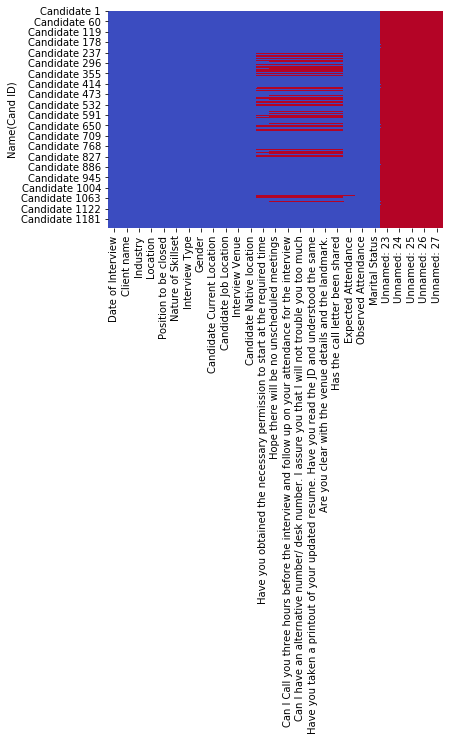

In [4]:
sns.heatmap(df.isnull(), cbar=False, cmap = 'coolwarm')

In [5]:
interview_df = df.drop( [ 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], axis = 1)

### Rename Features
The same heatmap also provides us with visualisation of the feature names. Many of which are very long so they've been renamed.

In [6]:
interview_df.columns = ['Date', 'Client', 'Industry', 'Client Location', 'Position', 'Skillset',
                        'Interview Type', 'Gender', 'Cand Location', 'Cand Job Location', 'Venue',
                        'Native Location', 'Permission', 'Unexpected Meeting', 'Follow up call', 'Alternative number',
                        'CV printout', 'Venue details', 'Shared Letter', 'Expected', 
                        'Attended', 'Marital Status']

A quick summary so far indicated that there are 1234 entries and 23 total columns. As each datatype is an object, we can safely assume the data is all categorical and that this will be a classification problem.

In [7]:
interview_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, Candidate 1 to nan
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                1233 non-null   object
 1   Client              1234 non-null   object
 2   Industry            1233 non-null   object
 3   Client Location     1233 non-null   object
 4   Position            1233 non-null   object
 5   Skillset            1233 non-null   object
 6   Interview Type      1233 non-null   object
 7   Gender              1233 non-null   object
 8   Cand Location       1233 non-null   object
 9   Cand Job Location   1233 non-null   object
 10  Venue               1233 non-null   object
 11  Native Location     1233 non-null   object
 12  Permission          1029 non-null   object
 13  Unexpected Meeting  986 non-null    object
 14  Follow up call      986 non-null    object
 15  Alternative number  986 non-null    object
 16  CV printout         

### Cleaning

Skillset contains a lot of unique values, many of which are irrelevant. As each candidate has been offered an interview, it's safe to assume whatever skillsets they possess are desirable in the eyes of the clients. Therefore this data is superficial and has been dropped.

In [8]:
print(interview_df['Skillset'].unique())

['Routine' 'Oracle' 'Accounting Operations' 'Banking Operations' 'Fresher'
 'AML/KYC/CDD' 'CDD KYC' 'Biosimiliars' 'RA Label' 'RA Publishing' 'EMEA'
 'LCM -Manager' 'Licensing – RA' 'generic drugs – RA' 'Biosimilars'
 'Regulatory' 'Analytical R & D' 'Analytical R&D'
 'Senior software engineer-Mednet' 'Tech lead-Mednet' 'Tech Lead- Mednet'
 'Technical Lead' 'Sr Automation Testing' 'TL' 'Senior Analyst'
 'production' 'Production' 'Core Java' 'Java J2EE' 'Oracle Plsql'
 'Java,SQL' 'Automation Testing Java' 'Submission Management'
 'Biosimillar' 'Publishing' 'Global Labelling' 'ALS Testing'
 'Java Developer' 'Lending and Liabilities' 'Lending & Liability'
 'Lending And Liabilities' 'L & L' 'Banking operations'
 'Lending&Liablities' 'JAVA/J2EE/Struts/Hibernate'
 'JAVA/SPRING/HIBERNATE/JSF' 'Java' 'Java JSF' 'Java,J2ee, JSF'
 'Java ,J2ee' 'Java J2ee' '11.30 AM' '10.00 AM' '9.00 Am' '12.30 Pm'
 '9.30 AM' '11.30 Am' 'Java, J2Ee' 'Java,J2EE' 'Java/J2ee/Core Java'
 'Java/J2ee' 'JAVA, J2ee' 'JAVA

I can see a lot of variation in the dates. They're such a mess and cleaning this will be incredibly time-consuming. While we might be able to generate some interesting insights with regards to the position in the week or year and the likelihood of a candidate attending an interview, I don't feel it's relevant to the question being asked. This feature has been dropped.

In [9]:
print(interview_df['Date'].unique())

['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019'
 '12.04.2020' '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16'
 '19.03.16' '24.05.2016' '05/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2016' '21/04/16' '2

An alternative number is not a contributing factor to whether or not someone attends an interview so this has been dropped.

In [10]:
interview_df.drop(['Skillset', 'Alternative number', 'Date'], axis=1, inplace=True)

Skimming through the dataset, I found an epty row with all missing values. This must have been a blank row imported by accedent. This has been dropped.

In [11]:
print(interview_df.iloc[1233])

Client                 ﻿﻿
Industry              NaN
Client Location       NaN
Position              NaN
Interview Type        NaN
Gender                NaN
Cand Location         NaN
Cand Job Location     NaN
Venue                 NaN
Native Location       NaN
Permission            NaN
Unexpected Meeting    NaN
Follow up call        NaN
CV printout           NaN
Venue details         NaN
Shared Letter         NaN
Expected              NaN
Attended              NaN
Marital Status        NaN
Name: nan, dtype: object


In [12]:
interview_df.drop(interview_df.index[[1233]], inplace = True)

The contents of this data set hold many upper and lower case values. To make this a better model, I've converted each row to contain only lowercase values.

In [13]:
interview_df[:] = interview_df[:].apply(lambda x: x.astype(str).str.lower()) # Wani, N (2019)
interview_df

,Client,Industry,Client Location,Position,Interview Type,Gender,Cand Location,Cand Job Location,Venue,Native Location,Permission,Unexpected Meeting,Follow up call,CV printout,Venue details,Shared Letter,Expected,Attended,Marital Status
Name(Cand ID),,,,,,,,,,,,,,,,,,,
Candidate 1,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,male,chennai,hosur,hosur,hosur,yes,yes,yes,yes,yes,yes,yes,no,single
Candidate 2,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,male,chennai,bangalore,hosur,trichy,yes,yes,yes,yes,yes,yes,yes,no,single
Candidate 3,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,male,chennai,chennai,hosur,chennai,nan,na,nan,nan,nan,nan,uncertain,no,single
Candidate 4,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,male,chennai,chennai,hosur,chennai,yes,yes,no,no,yes,yes,uncertain,no,single
Candidate 5,hospira,pharmaceuticals,chennai,production- sterile,scheduled walkin,male,chennai,bangalore,hosur,chennai,yes,yes,yes,yes,yes,yes,uncertain,no,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Candidate 1229,pfizer,pharmaceuticals,chennai,niche,scheduled,male,chennai,chennai,chennai,bangalore,yes,yes,yes,yes,yes,yes,yes,yes,married
Candidate 1230,pfizer,pharmaceuticals,chennai,niche,scheduled,male,chennai,chennai,chennai,hyderabad,yes,yes,yes,yes,yes,yes,yes,yes,single
Candidate 1231,pfizer,pharmaceuticals,chennai,niche,scheduled,male,chennai,chennai,chennai,hyderabad,yes,yes,yes,yes,yes,yes,yes,yes,married


Many other features in this set contain unique valuse. I'm not going to desplay these unique valuse, but I will show what I've changed.

In [14]:
interview_df['Client'].replace(['standard chartered bank chennai', 'aon hewitt gurgaon', 'hewitt'], 
                               ['standard chartered bank', 'aon hewitt', 'aon hewitt'], inplace = True)


interview_df['Industry'].replace(['it products and services', 'it services'], 
                                 ['it', 'it'], inplace = True)

interview_df['Client Location'].replace(['- cochin-', '- cochin- ', 'chennai '], 
                                        ['cochin', 'cochin', 'chennai'], inplace = True)

interview_df['Position'].replace(['production- sterile'], 
                                 ['production'], inplace = True)

# They had 3 types of interivew, walk-ins, scheduled and scheduled walk-ins. I'm not sure what -> 
# scheduled walk-ins means exactly but in my opinion if it's been scheduled it should be called scheduled.

interview_df['Interview Type'].replace(['scheduled walk in', 'sceduled walkin','scheduled walkin', 'scheduled ','walkin ' ],
                                       ['scheduled', 'scheduled','scheduled', 'scheduled', 'walk-in'], inplace = True)

interview_df['Cand Location'].replace(['- cochin-', '- cochin- ', 'chennai '], 
                                      ['cochin','cochin', 'chennai'], inplace = True)

interview_df['Cand Job Location'].replace(['- cochin-', '- cochin- '],
                                          ['cochin', 'cochin'], inplace = True)

interview_df['Native Location'].replace(['- cochin-', '- cochin- ', 'delhi /ncr'],
                                        ['cochin', 'cochin', 'delhi'], inplace = True)

interview_df['Venue'].replace(['- cochin-', '- cochin- '],
                              ['cochin', 'cochin'], inplace = True)

# Recruitment is a fast-paced environment, you don't have time to wait for an answer. An assertive recruiter ->
# will ask for a solid yes or no, so wherever the answers are ambiguous, I've assumed 'no'.

interview_df['Permission'].replace(['na', 'not yet', 'yet to confirm','nan'],
                                   ['no', 'no', 'no','no'], inplace = True)

interview_df['Follow up call'].replace(['na', 'no dont','nan'],
                                       ['no', 'no','no'], inplace = True)

interview_df['Unexpected Meeting'].replace(['na', 'not sure', 'cant say','nan'],
                                           ['no', 'no', 'no','no'], inplace = True)

interview_df['CV printout'].replace(['na', 'not yet', 'no- will take it soon','nan'],
                                    ['no', 'no', 'no','no'], inplace = True)

interview_df['Venue details'].replace(['na', 'no- i need to check','nan'],
                                      ['no', 'no','no'], inplace = True)

interview_df['Shared Letter'].replace(['na', 'not sure', 'need to check', 'not yet', 'yet to check',
                                       'havent checked','nan'],
                                      ['no', 'no', 'no', 'no', 'no', 'no','no'], inplace = True)

interview_df['Expected'].replace(['uncertain', 'nan', '11:00 am', '10.30 am'],
                                 ['no', 'no','yes','yes'], inplace = True)

interview_df['Attended'].replace(['yes ', 'no '], 
                                 ['yes', 'no'], inplace= True)

In [15]:
for c in interview_df.columns:
    print(c)
    print(interview_df[c].unique())

Client
['hospira' 'aon hewitt' 'ust' 'standard chartered bank' 'anz' 'pfizer'
 'astrazeneca' 'flextronics' 'prodapt' 'williams lea' 'barclays'
 'woori bank']
Industry
['pharmaceuticals' 'it' 'bfsi' 'electronics' 'telecom']
Client Location
['chennai' 'gurgaon' 'bangalore' 'hyderabad' 'gurgaonr' 'delhi' 'cochin'
 'noida']
Position
['production' 'selenium testing' 'dot net' 'aml' 'trade finance' 'routine'
 'niche']
Interview Type
['scheduled' 'walkin' 'walk-in']
Gender
['male' 'female']
Cand Location
['chennai' 'gurgaon' 'bangalore' 'hyderabad' 'delhi' 'cochin' 'noida']
Cand Job Location
['hosur' 'bangalore' 'chennai' 'gurgaon' 'visakapatinam' 'cochin' 'noida']
Venue
['hosur' 'gurgaon' 'bangalore' 'chennai' 'hyderabad' 'cochin' 'noida']
Native Location
['hosur' 'trichy' 'chennai' 'gurgaon' 'noida' 'delhi' 'cochin'
 'trivandrum' 'bangalore' 'coimbatore' 'salem' 'tanjore' 'hyderabad'
 'mumbai' 'pune' 'kolkata' 'allahabad' 'panjim' 'cuttack' 'visakapatinam'
 'belgaum' 'patna' 'chitoor' 'anan

### Data Exploration

Now I want to compare the location data. The locations are: 
- Candidate location (Cand Location)
- Candidate hometown (Native Location)
- Candidate current job location (Cand Job Location)
- The client location (Client Location)
- Interview location (Venue)

Native location is redundant to this project so it has been dropped.

I can see a very high correlation between Candidate location, Client location and Venue location, this makes sense because when applying for work, people tend to apply in the location they currently reside. It also makes sense that most interviews are at the clients business location. As this is highly correlation, Client location has been dropped.

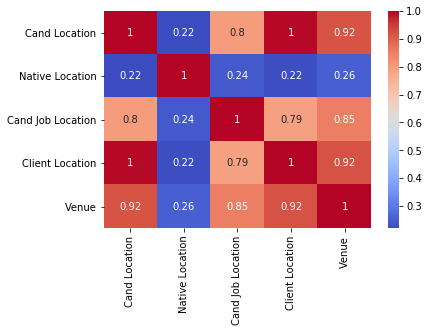

In [16]:
cndloc = interview_df[[ 'Cand Location', 'Native Location', 'Cand Job Location', 'Client Location', 'Venue']]

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

cndloc1 = encode.fit_transform(cndloc['Cand Location'])
cndloc2 = encode.fit_transform(cndloc['Native Location'])
cndloc3 = encode.fit_transform(cndloc['Cand Job Location'])
cndloc4 = encode.fit_transform(cndloc['Client Location'])
cndloc5 = encode.fit_transform(cndloc['Venue'])


data = pd.DataFrame({'Cand Location':cndloc1, 'Native Location':cndloc2, 'Cand Job Location':cndloc3, 'Client Location':cndloc4, 'Venue': cndloc5})
cl = data.corr()
cl
sns.heatmap(cl, annot = True, cmap = 'coolwarm')

In [17]:
interview_df = interview_df.drop(['Native Location','Client Location'], axis = 1)

Over all expected vs attended. Less people attended than antisipated.

In [18]:
print(interview_df['Expected'].value_counts())
print('\n')
print(interview_df['Attended'].value_counts())

yes    885
no     348
Name: Expected, dtype: int64


yes    783
no     450
Name: Attended, dtype: int64


Text(0.5, 1.0, 'Attended')

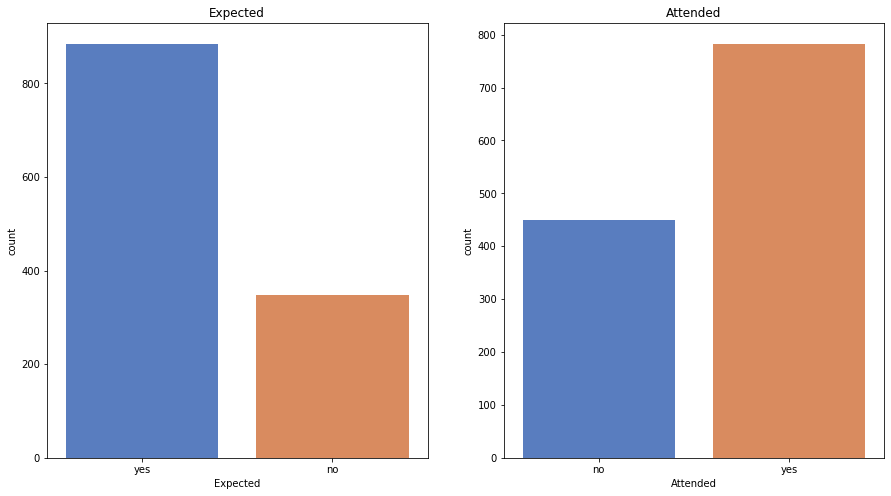

In [19]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

sns.countplot(x=interview_df['Expected'], palette= "muted", ax=ax1)
ax1.set_title('Expected')

sns.countplot(x=interview_df['Attended'],palette= "muted", ax=ax2)
ax2.set_title('Attended')

From the binary questions, there is a high corrolation of 92 per cent between permission and expected attendence. This would indicate that permission was a deciding factor for the recruiters when predicting candidate expected attendence.

There's a 90 per cent corolation between expected and shared letter. Making this the second best deciding factor for candidate 'expected' attendence.

When compared with observed attendence, it's clear that the predictions are off, however permissions and shared letter are still the highest when compared with observed attendece so these are important factors.

Marital status seems to bare no corolation with any of the variables, this is not surprising as marital status is unlikely to be a deciding factor in attendence. This feature has been dropped.

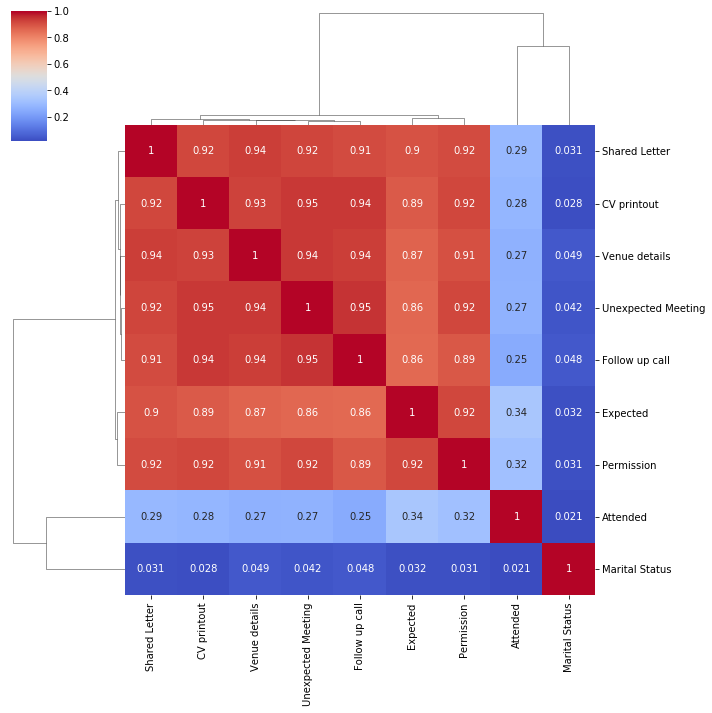

In [20]:
attended = interview_df[[ 'Attended', 'Expected', 'Unexpected Meeting', 'Follow up call', 'CV printout', 'Venue details', 'Shared Letter', 'Permission','Marital Status']]

encode = LabelEncoder()

attended0 = encode.fit_transform(attended['Attended'])
attended1 = encode.fit_transform(attended['Expected'])
attended2 = encode.fit_transform(attended['Unexpected Meeting'])
attended3 = encode.fit_transform(attended['Follow up call'])
attended4 = encode.fit_transform(attended['CV printout'])
attended5 = encode.fit_transform(attended['Venue details'])
attended6 = encode.fit_transform(attended['Shared Letter'])
attended7 = encode.fit_transform(attended['Permission'])
attended8 = encode.fit_transform(attended['Marital Status'])

data = pd.DataFrame({'Attended':attended0,'Expected':attended1, 'Unexpected Meeting':attended2, 'Follow up call':attended3, 'CV printout':attended4, 'Venue details':attended5,'Shared Letter':attended6,'Permission':attended7, 'Marital Status':attended8})
atd = data.corr()
sns.clustermap(atd, annot = True, cmap = 'coolwarm')

In [21]:
interview_df = interview_df.drop(['Marital Status'], axis = 1)

In the two plots below, the Expected plot illustrates that people who knew they were not attending the interview did not gain permission.

We can see in the Attendance plot that some candidates must have intended to attend but did not in the end.

Text(0.5, 1.0, 'Attendance')

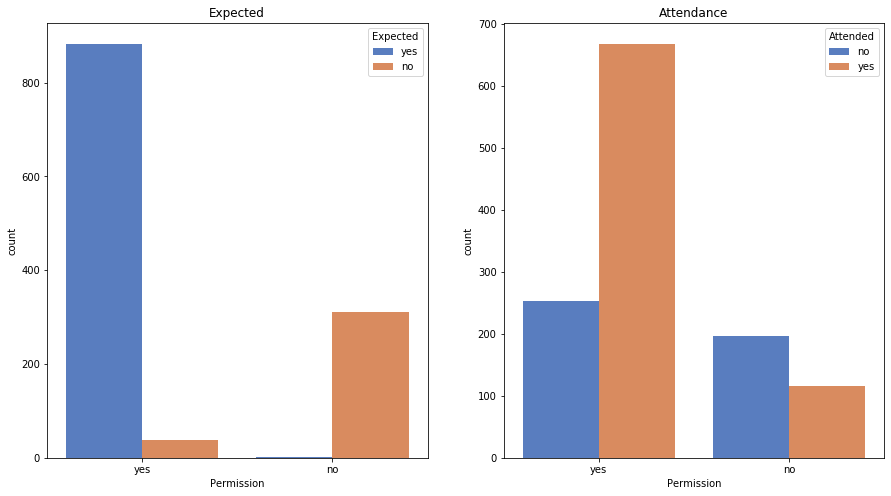

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

sns.countplot(x=interview_df['Permission'], hue=interview_df['Expected'], palette = "muted", ax=ax1)
ax1.set_title('Expected')

sns.countplot(x=interview_df['Permission'], hue=interview_df['Attended'], palette = "muted",  ax=ax2)
ax2.set_title('Attendance')

We can see in the Industry Location plot that finance dominates in the city of Chennai. This recruitment data may have a much larger focus on Finance, this means that we're really only assessing the candidate attendence with in the financial sector. Other sectors could have varying attendence rates. For example, low skilled jobs could have higher or lower levels of attendence. 

Other major cities in India have not been included in the data, it would be interesting to see the spread of other industries in differing cities and how interview attendence fairs from city to city. 

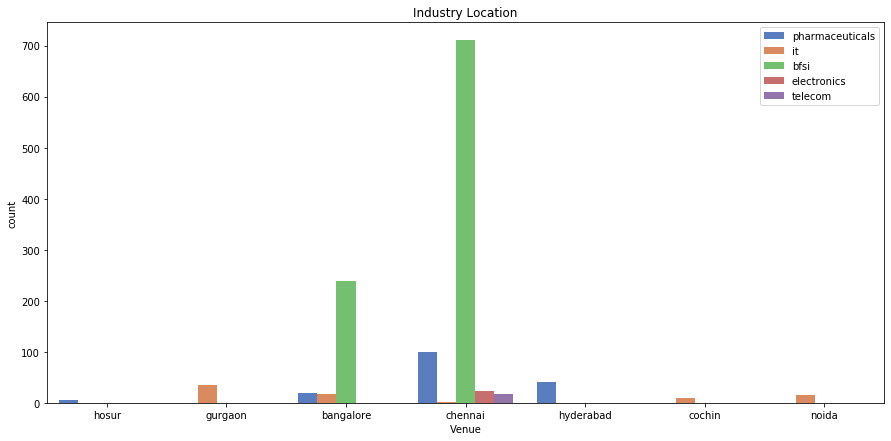

In [23]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=interview_df['Venue'], hue=interview_df['Industry'], ax = ax, data = interview_df, palette="muted")
ax.set_title('Industry Location')
ax.legend(loc='upper right')
# sns.countplot(x = interview_df['Industry'], y = interview_df['Venue'], data = interview_df)

Rounding to 2 significant figures, we can see that 78 per cent of candidates are male. Females candidates make up the remaining 22 per cent.

We can see that for every 100 male applicants, 77 are applying for finance.
Similarly, we can see that for every 100 female applicants, 78 are applying for finance. 

In [24]:
interview_df['Gender'].value_counts()

male      965
female    268
Name: Gender, dtype: int64

In [25]:
male = len(interview_df[interview_df['Gender']=='male']['Gender'])
female = len(interview_df[interview_df['Gender']=='female']['Gender'])
total = len(interview_df['Gender'])

print('male candidates:',male / total * 100, 'per cent')
print('female candidate:', female / total * 100 , 'per cent')

male candidates: 78.26439578264396 per cent
female candidate: 21.73560421735604 per cent


In [26]:
print('Of bfsi candidate')
interview_df[interview_df['Industry']=='bfsi']['Gender'].value_counts()

Of bfsi candidate


male      741
female    208
Name: Gender, dtype: int64

In [27]:
bfsi = interview_df[interview_df['Industry']=='bfsi']

bfsi_male = len(bfsi[bfsi['Gender']=='male']['Gender'])
bfsi_female = len(bfsi[bfsi['Gender']=='female']['Gender'])

print('For every 100 bfsi candidates' ,( bfsi_male / male)*100, 'are male.' )
print('For every 100 bfsi candidates', (bfsi_female / female)*100, 'are female.')

For every 100 bfsi candidates 76.78756476683938 are male.
For every 100 bfsi candidates 77.61194029850746 are female.


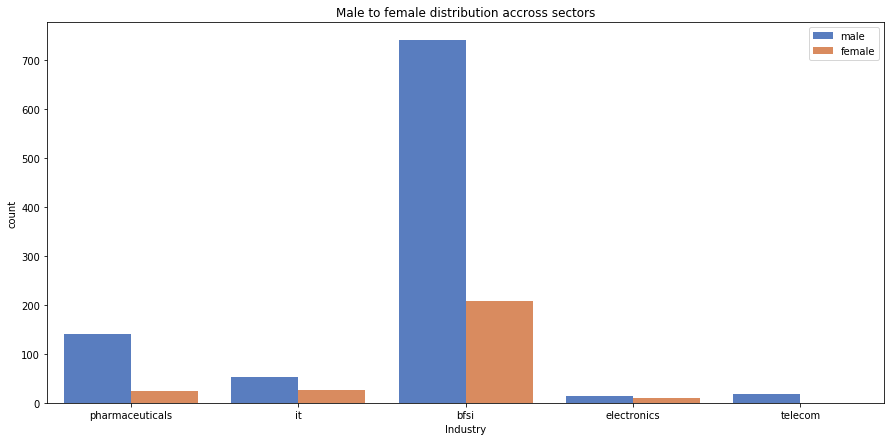

In [28]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=interview_df['Industry'], hue=interview_df['Gender'], ax = ax, palette="muted")
ax.set_title('Male to female distribution accross sectors')
ax.legend(loc='upper right')

In [29]:
interview_df.head(2)

,Client,Industry,Position,Interview Type,Gender,Cand Location,Cand Job Location,Venue,Permission,Unexpected Meeting,Follow up call,CV printout,Venue details,Shared Letter,Expected,Attended
Name(Cand ID),,,,,,,,,,,,,,,,
Candidate 1,hospira,pharmaceuticals,production,scheduled,male,chennai,hosur,hosur,yes,yes,yes,yes,yes,yes,yes,no
Candidate 2,hospira,pharmaceuticals,production,scheduled,male,chennai,bangalore,hosur,yes,yes,yes,yes,yes,yes,yes,no


### Label Encoding

Initially, I OneHotEncoded (OHE) this data. OHE was messy and the results very similar. I have decided to Label Encode for this project. I am aware that I could have used a for-loop to encode this data, however, this was the approach that made the most sense to me. 

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

interview_df['Client'] = encoder.fit_transform(interview_df['Client'])
interview_df['Industry'] = encoder.fit_transform(interview_df['Industry'])
interview_df['Position'] = encoder.fit_transform(interview_df['Position'])
interview_df['Interview Type'] = encoder.fit_transform(interview_df['Interview Type'])
interview_df['Gender'] = encoder.fit_transform(interview_df['Gender'])
interview_df['Cand Location'] = encoder.fit_transform(interview_df['Cand Location'])
interview_df['Cand Job Location'] = encoder.fit_transform(interview_df['Cand Job Location'])
interview_df['Venue'] = encoder.fit_transform(interview_df['Venue'])
interview_df['Permission'] = encoder.fit_transform(interview_df['Permission'])
interview_df['Unexpected Meeting'] = encoder.fit_transform(interview_df['Unexpected Meeting'])
interview_df['Follow up call'] = encoder.fit_transform(interview_df['Follow up call'])
interview_df['CV printout'] = encoder.fit_transform(interview_df['CV printout'])
interview_df['Venue details'] = encoder.fit_transform(interview_df['Venue details'])
interview_df['Shared Letter'] = encoder.fit_transform(interview_df['Shared Letter'])
interview_df['Expected'] = encoder.fit_transform(interview_df['Expected'])
interview_df['Attended'] = encoder.fit_transform(interview_df['Attended'])

# MachineLearning with Python (2018)

In [31]:
interview_df.head()

,Client,Industry,Position,Interview Type,Gender,Cand Location,Cand Job Location,Venue,Permission,Unexpected Meeting,Follow up call,CV printout,Venue details,Shared Letter,Expected,Attended
Name(Cand ID),,,,,,,,,,,,,,,,
Candidate 1,5,3,3,0,1,1,4,4,1,1,1,1,1,1,1,0
Candidate 2,5,3,3,0,1,1,0,4,1,1,1,1,1,1,1,0
Candidate 3,5,3,3,0,1,1,1,4,0,0,0,0,0,0,0,0
Candidate 4,5,3,3,0,1,1,1,4,1,1,0,0,1,1,0,0
Candidate 5,5,3,3,0,1,1,0,4,1,1,1,1,1,1,0,0


### Split data into training and testing set

In [32]:
y = interview_df['Attended']
X = interview_df.drop(['Attended'], axis = 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Modeling 

As the data is effectily a series of yes no questions and ultimatily calminate in candidate either attending or not, using a decision tree algorythm to model this data seems the most logical.

In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [35]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 34  49]
 [ 34 130]]


              precision    recall  f1-score   support

           0       0.50      0.41      0.45        83
           1       0.73      0.79      0.76       164

    accuracy                           0.66       247
   macro avg       0.61      0.60      0.60       247
weighted avg       0.65      0.66      0.65       247



In [36]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns[:])

# Portilla, J (2020)

/Users/seanhensel-coe/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


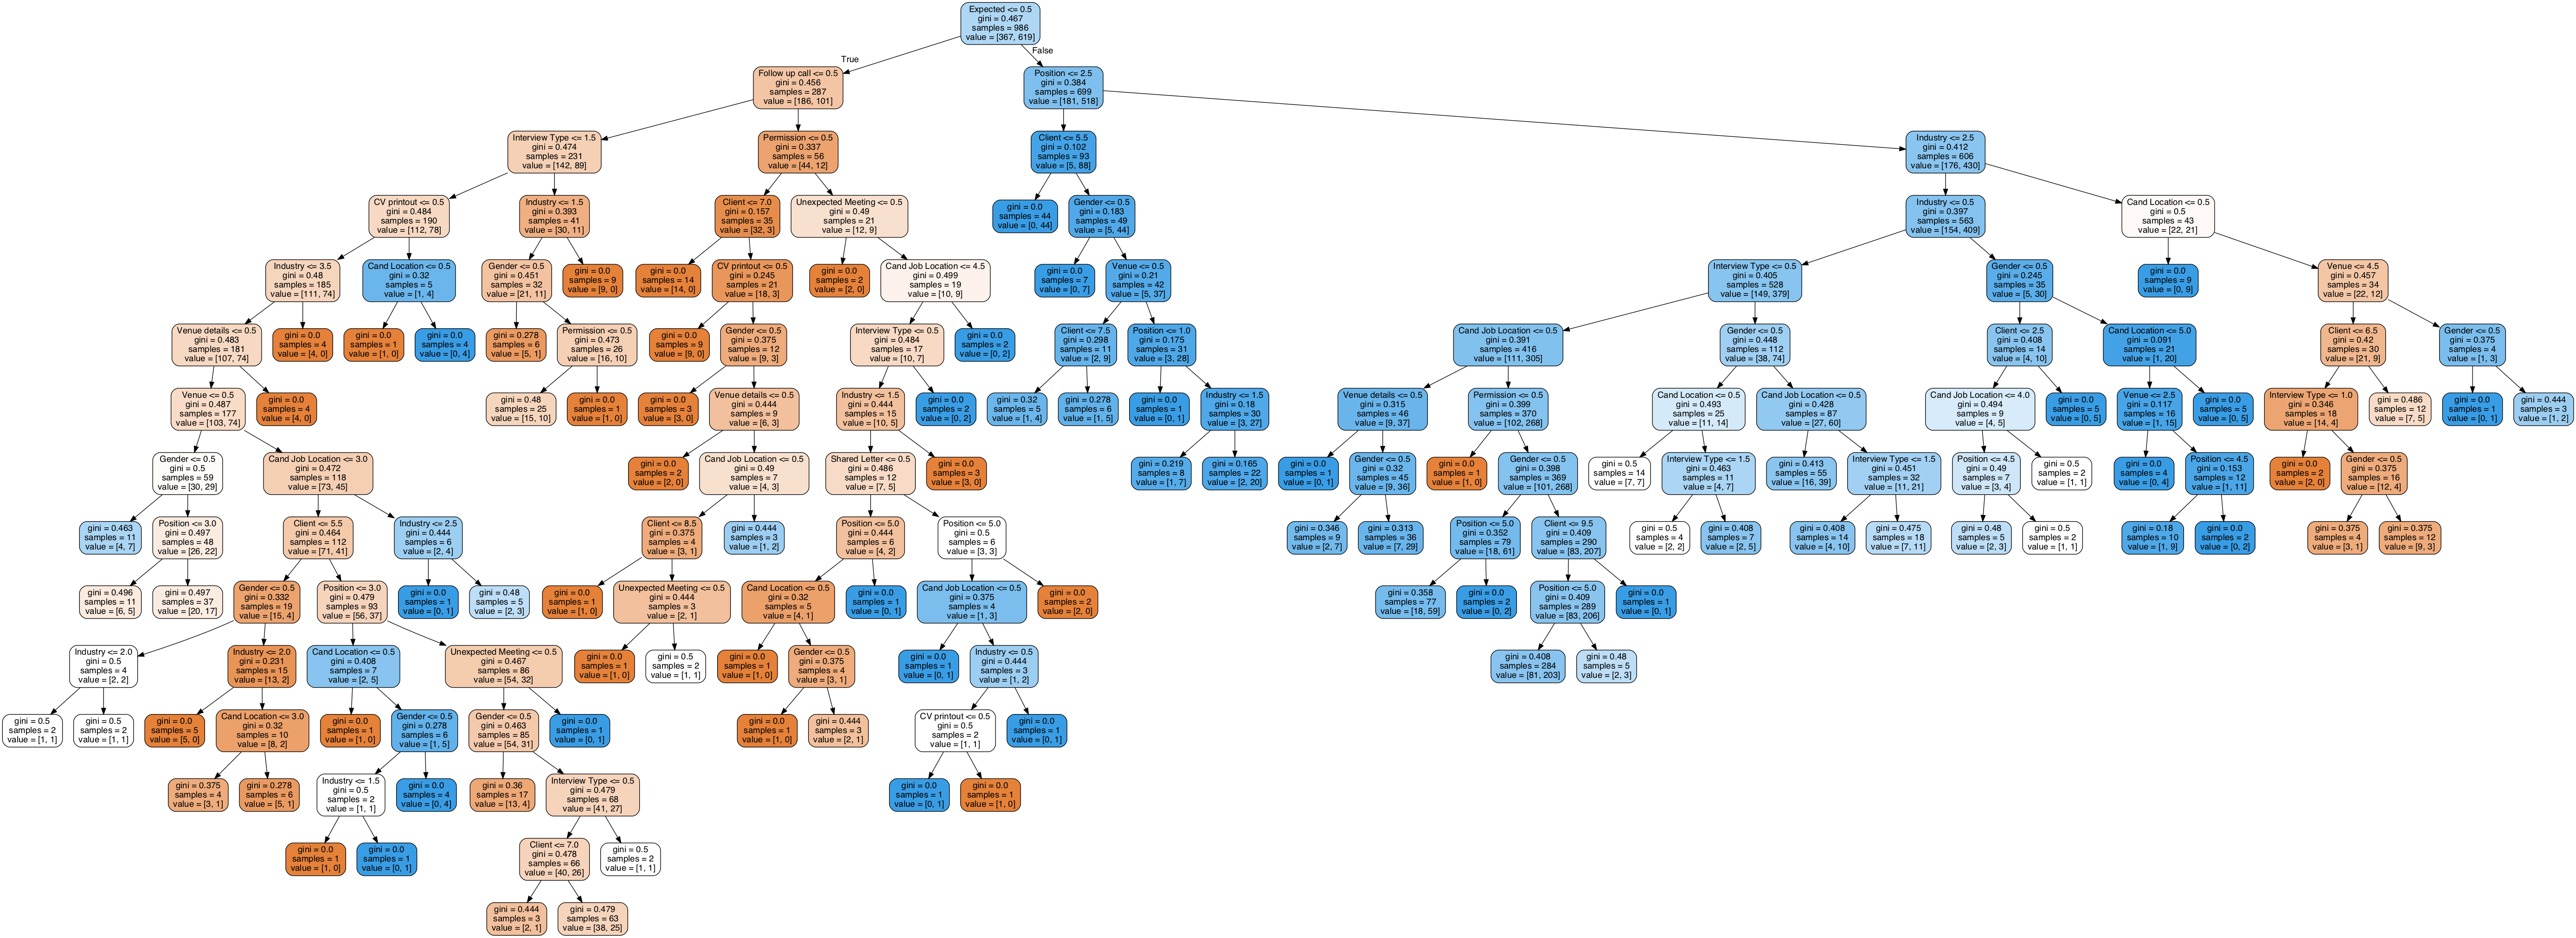

In [37]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Portilla, J (2020)

0 = Did not attend
1 = Attended

We can infer from the classification report that we have a total model accuracy of 66 per cent. Per class accuracy, we have a score of 0.79 for attended but a lower accuracy of 0.41 for those who didn't attend. Combined with our precision scores, we get a total f1-score of 0.45 for candidates who did not attend and 0.76 for candidates who did attend.

### Summary 

The purpose of this assignment was to assess my abilities in data exploration and to test my knowledge and understanding of python and some of the techniques used for data analysis. For this reason, I did not look into cross-validation, misclassification rate or generalisation error as a means of finding the most accurate algorithm to fit the data. However, for future studies, this process could be utilised to gain accurate and predictive insights into the world of recruitment.

The dataset size is limiting and I have the feeling that this is a small part of a much larger portfolio of data collected. As mentioned earlier in the project, missing cities and industries mean it's hard to paint a large scale picture of interview attendance but it does give us a general idea of the kind of insights possible. It's hard to say with such a tiny data set, but I did find it interesting that men and women both seem to gravitate equally towards finance. 

I was able to demonstrate that 92 per cent of client location and interview venue location is in the same place and that 79 per cent of candidates interview in the same city as their current job. Native location was the least correlated with the other location variables. I can see that many people leave their native town for work. As most of the data collected is for recruitment in the financial sector, we can argue that people who have left their native towns are looking for work in finance (see Native location and industries plot below).

Overall, I was able to predict with 66 per cent model accuracy whether or not a candidate would attend an interview. I believe it is possible to build a more accurate model. This could be achieved by separately modelling scheduled candidates and walk-ins. This is because we can gain more information on a screened candidate while someone walking in is an event outside of our control and can, therefore, skew the data. For screened calls, better qualification questions could be used to assess a candidate's likelihood of attending (i.e. Did the candidate respond to a Google calendar invite? How many times did the recruiter touch base with a candidate before an interview? Was the candidates screening experience positive or negative?). 

Other than an observed correlation between permission and shared letter, we have no idea how recruiters are basing expected attendance. Is it a gut feeling or a score given to each candidate based on how they answer the screening questions? Using a technique based on the latter, we could attain with a higher degree of certainty the likelihood of a candidate attending. 

I'll add that a large margin of error needs to be attributed to human behaviour. The recruitment industry revolves around people and is notoriously unpredictable. Life happens, we get lost, we fall ill and some folk are just unreliable or unorganised. 

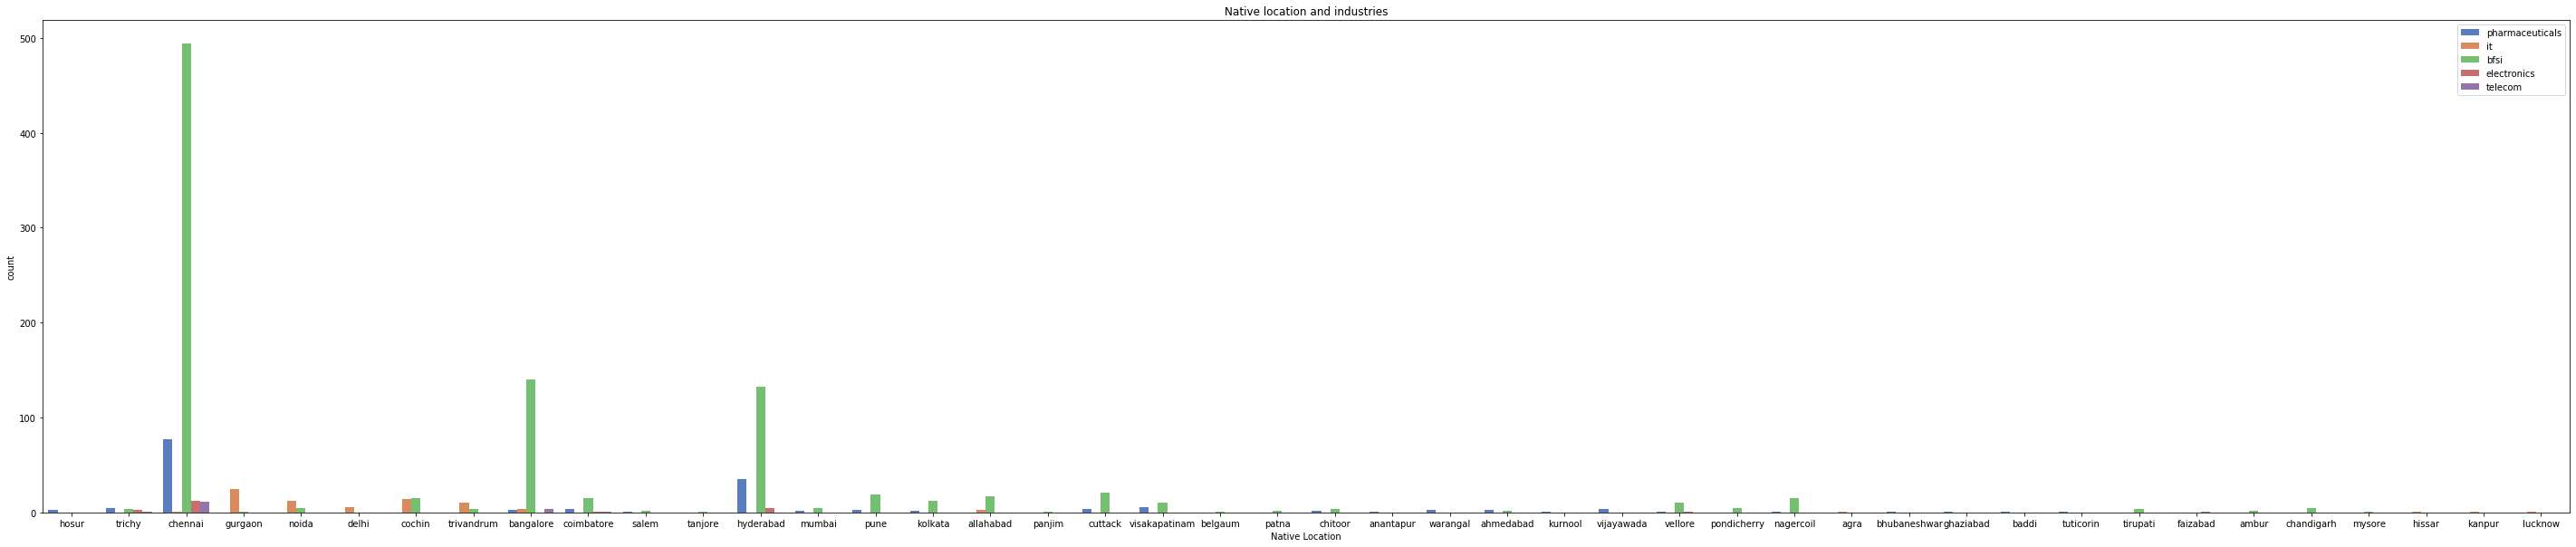

In [144]:
fig_dims = (50, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=interview_df['Native Location'], hue=interview_df['Industry'], ax = ax, data = interview_df, palette="muted")
ax.set_title('Native location and industries')
ax.legend(loc='upper right')

### <div align="center"> References </div>



MachineLearning with Python (2018), Python for Machine Learning - Part 16 - Label Encoding - Preprocessing, online video, YouTube, viewed 22 June 2020, < https://www.youtube.com/watch?v=hJ2sKPj5Xn4&list=PLgh5Ytz2SV3DNe8fBTvgUN3aXD0jKzMr0&index=51&t=0s > 

Portilla, J (2020), Decision Trees and Random Forest with Python, Python for Data Science and Machine Learning Bootcamp, Copyright © 2020 Udemy, Inc. streaming video, viewed on 24 June 2020, < https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/ >

Raghavan, V (2017), The Interview Attendance Problem, Data files © Original Authors, viewed 19 June 2020, < www.kaggle.com/vishnusraghavan/the-interview-attendance-problem >


Wani, N (2019), Convert whole dataframe from lower case to upper case with Pandas, viewed 20 June 2020, < https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas/39512116 >

